In [111]:
import datasets
import spacy as spacy
import nltk
import matplotlib.pyplot as pl

from spacy.matcher import Matcher

In [3]:
#!python3 -m spacy download en_core_web_sm

In [4]:
# download & setup dataset
#nltk.download('twitter_samples')
all_positive_tweets = nltk.corpus.twitter_samples.strings("positive_tweets.json")
all_negative_tweets = nltk.corpus.twitter_samples.strings("negative_tweets.json")

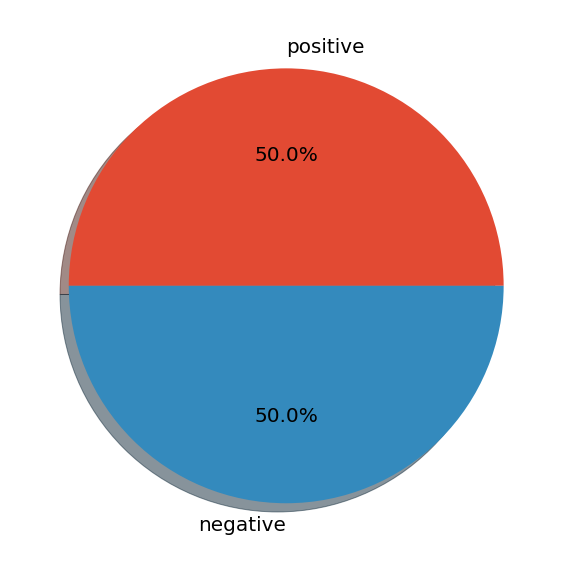

In [5]:
pl.pie(
    [len(all_positive_tweets), len(all_negative_tweets)],
    labels=['positive', 'negative'],
    autopct='%1.1f%%',
    shadow=True
);

In [59]:
# We only need tokenizer & tagger (for stop words)
nlp = spacy.load("en_core_web_sm")

In [145]:
class HashtagMerger:
    def __init__(self, vocab):
        self.matcher = Matcher(vocab)
        self.matcher.add('HASHTAG', None, [{'ORTH': '#'}, {'IS_ASCII': True}])        
    
    def __call__(self, doc):
        with doc.retokenize() as retokenizer:
            for _, start, end in self.matcher(doc):
                assert end - start == 2
                span = doc[start:end]
                merged = retokenizer.merge(span, attrs={"LEMMA": doc[end - 1].lemma_})
        return doc 
    
nlp = spacy.load("en_core_web_sm")
# We only need tokenizer & lemmatizer
nlp.disable_pipes('ner')
nlp.add_pipe(HashtagMerger(nlp.vocab), last=True)
tweet = all_positive_tweets[2277]
doc = nlp(tweet)
#tokens = [t for t in doc if not t.is_stop]

tokens = [
    t.lemma_ for t in doc if not (t.like_url or t.is_stop)
]
tokens

['beautiful',
 'sunflower',
 'sunny',
 'Friday',
 'morning',
 ':)',
 'sunflower',
 'favourite',
 'happy',
 'Friday',
 '…']